# Seoul Bike Sharing Price Prediction using scikit learn and xgboost

## Description

Seoul is the capital of south Korea, where people mostly use rental bikes as there travelling transport we have to predict demand for shared bikes in Seoul based on various environmental factors

Attribute contains :-
    <ul>
        <li>Date : year-month-day</li>
        <li>Rented Bike count - Count of bikes rented at each hour</li>
        <li>Hour - Hour of he day</li>
        <li>Temperature-Temperature in Celsius</li>
        <li>Humidity - %</li>
        <li>Windspeed - m/s</li>
        <li>Visibility - 10m</li>
        <li>Dew point temperature - Celsius</li>
        <li>Solar radiation - MJ/m2</li>
        <li>Rainfall - mm</li>
        <li>Seasons - Winter, Spring, Summer, Autumn</li>
        <li>Holiday - Holiday/No holiday</li>
        <li>Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)
</li>
    </ul>

## Importing Liberary

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

## Loading Data

In [4]:
df = pd.read_csv("SeoulBikeData.csv", encoding = "unicode_escape")

In [5]:
df.head(13)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [8]:
# need to convert date into datetime


In [9]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [10]:
df.Date.dtype

dtype('<M8[ns]')

In [11]:
# let convert date into day,month and year indivisual columns in dataset

In [12]:
df["year"] = df["Date"].dt.year

In [13]:
df["month"] = df["Date"].dt.month

In [14]:
df["day"] = df["Date"].dt.day

In [15]:
df["weekday"] = df["Date"].dt.day_name()

In [16]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday


In [17]:
df.drop(columns="Date", axis =1,inplace =True)

In [18]:
numerical_var = [var for var in df.columns if df[var].dtype != "O" ]
numerical_var

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'year',
 'month',
 'day']

In [19]:
descrete_var = [var for var in numerical_var if len(df[var].unique()) < 25]
descrete_var

['Hour', 'year', 'month']

In [20]:
categorical_var = [var for var in df.columns if var not in numerical_var ]
categorical_var

['Seasons', 'Holiday', 'Functioning Day', 'weekday']

In [21]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday


## EDA(Exploratrive Data Analylsis)

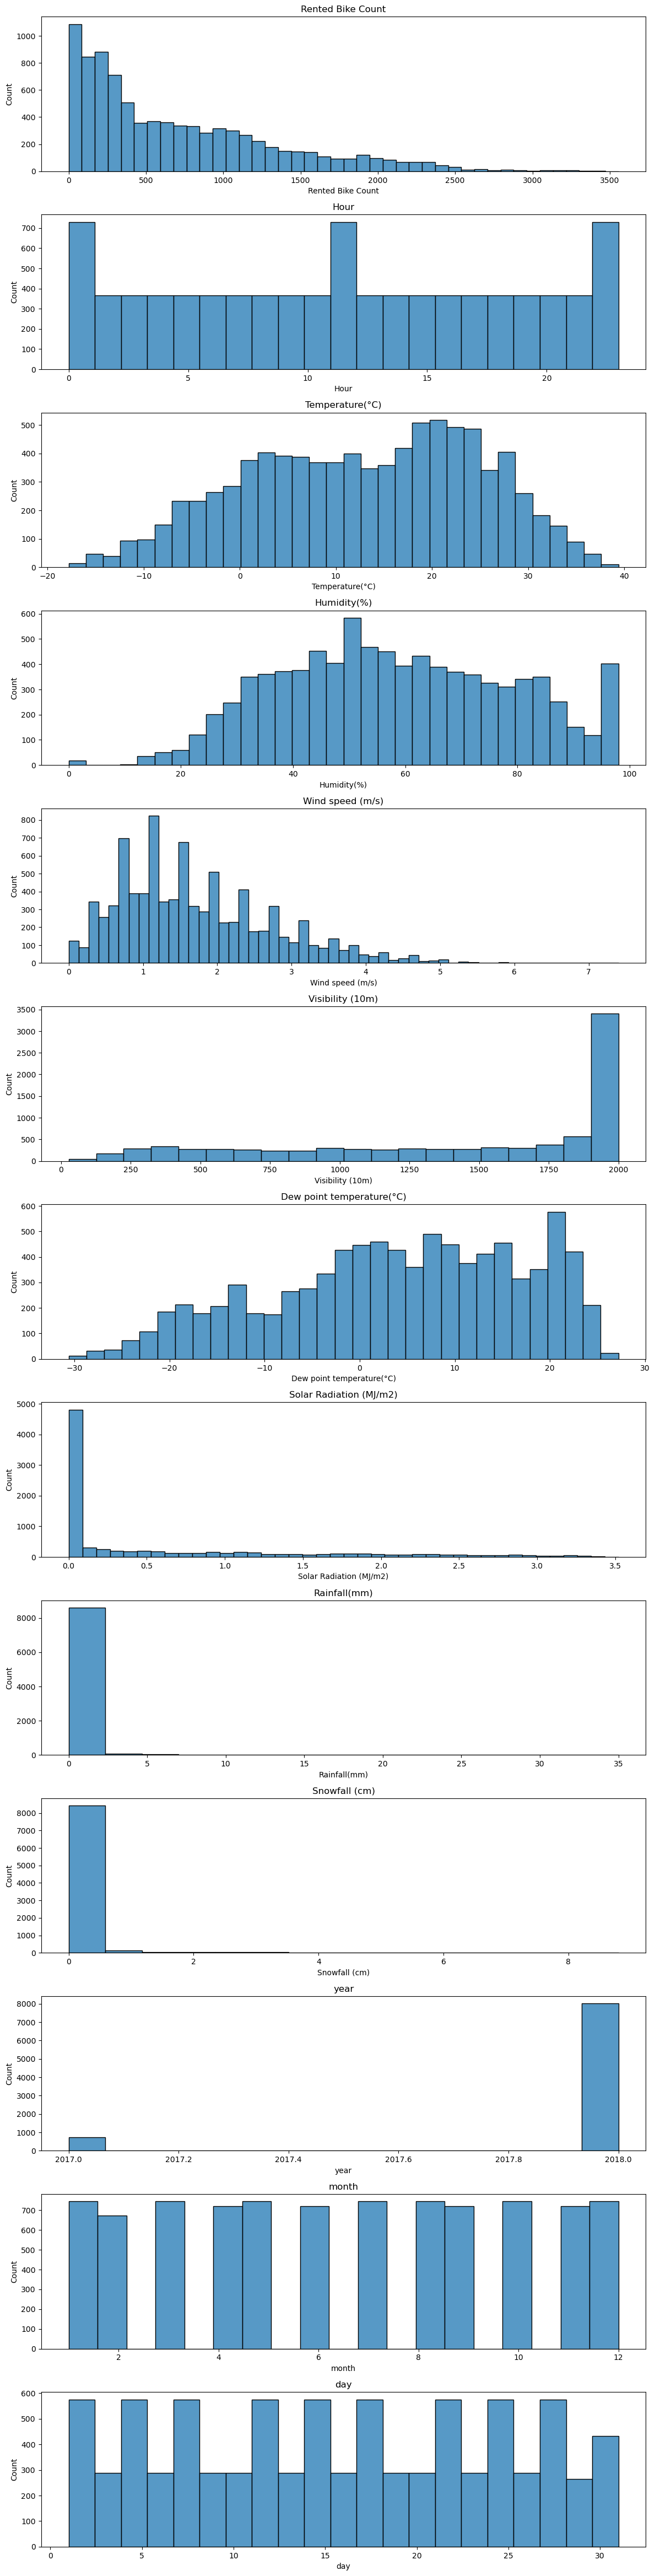

In [22]:
plt.figure(figsize = (12,50))
counter = 1
for var in numerical_var:
    if counter < 20:
        plt.subplot(14,1,counter)
        sns.histplot(x = var , data = df)
        plt.title(var)
    counter += 1
plt.tight_layout()

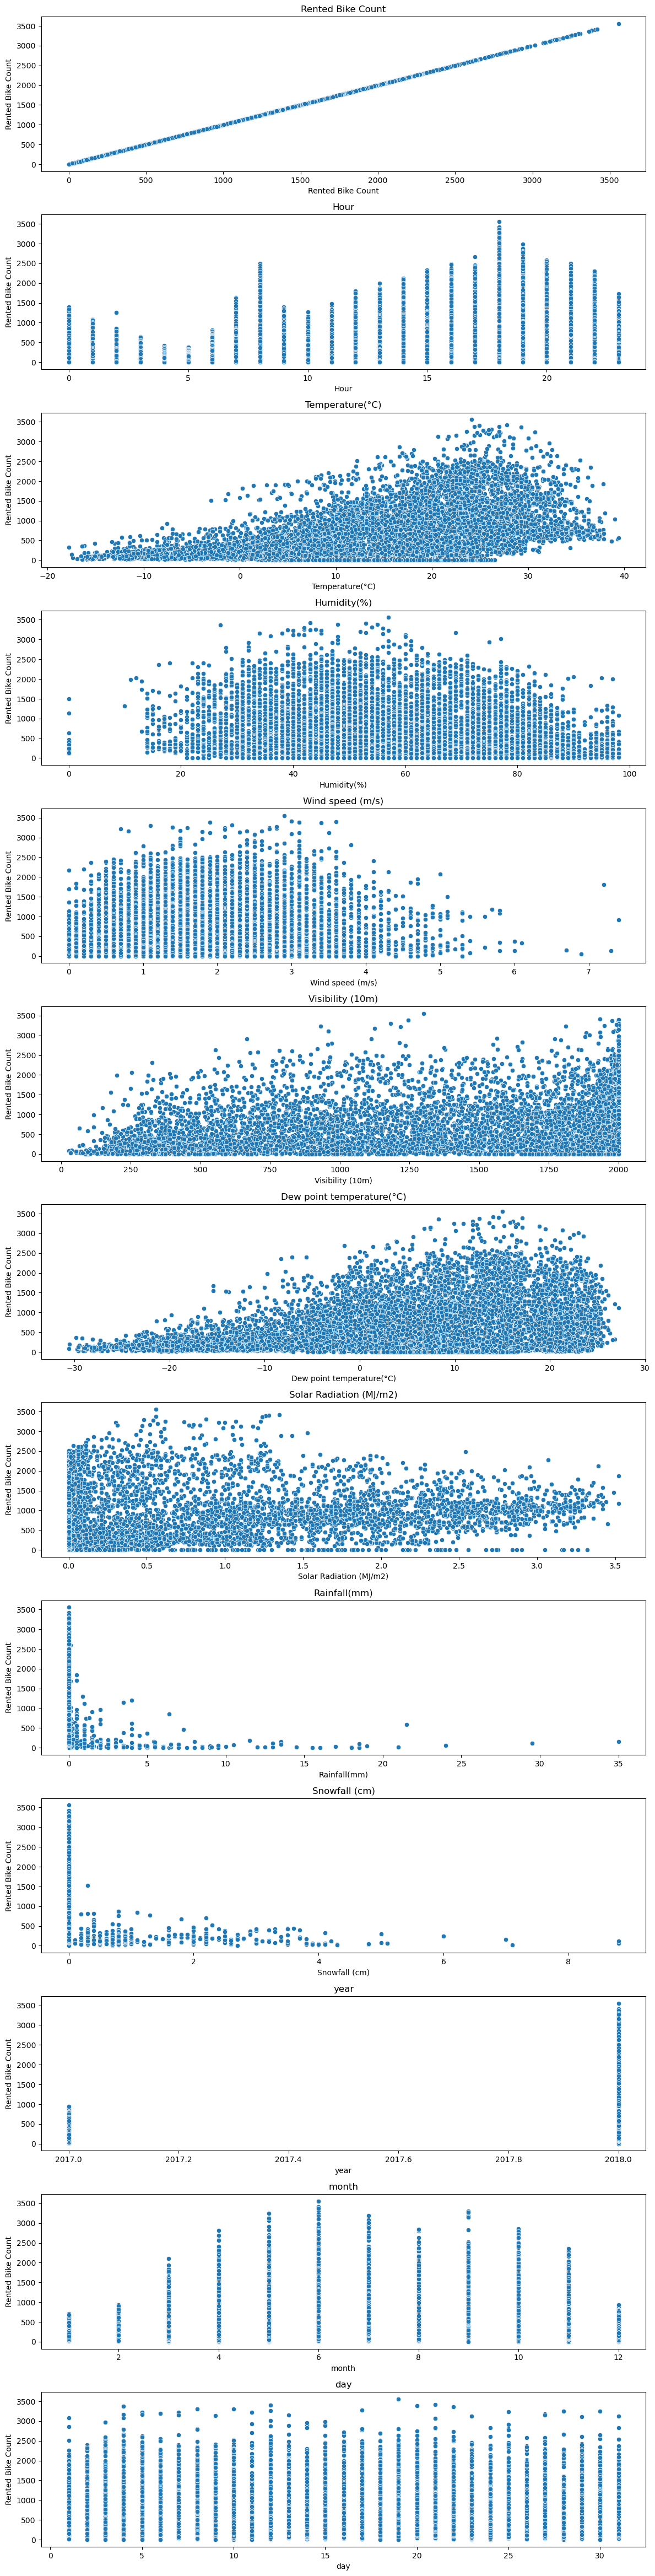

In [23]:
plt.figure(figsize = (12,50))
counter = 1
for var in numerical_var:
    if counter < 20:
        plt.subplot(14,1,counter)
        sns.scatterplot( x = var ,y = "Rented Bike Count" ,data = df)
        plt.title(var)
    counter += 1
plt.tight_layout()

### summary

1. Here we can see that seoul people renting bikes maximum at __8am__ because may be many people were going there office thats why they rended at 8am and at __6pm__ many people renting bikes because after office they were going to home
2. we can see when the temperature is between 15 to 30 degree celcius people renting bikes
3. when there is no __rain__ and __snowfall__ people renting more bikes
4. we can see peple renting maximum amount of bikes in __may,june,july,august,september__


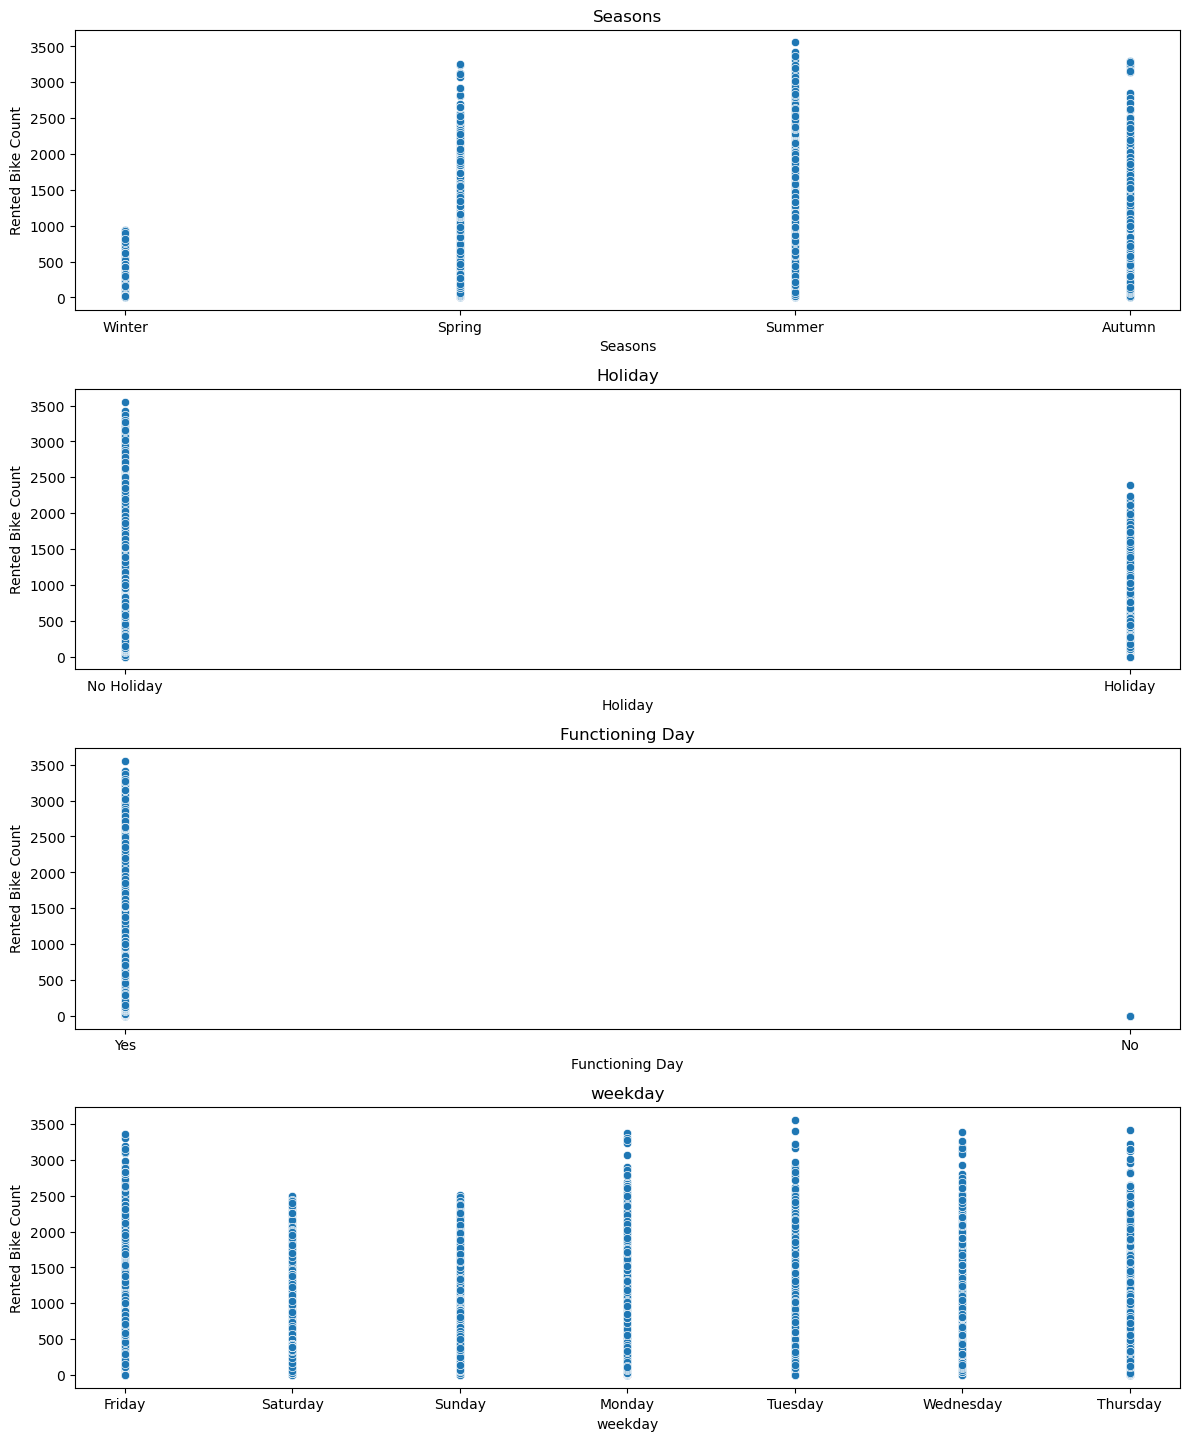

In [24]:
plt.figure(figsize = (12,50))
counter = 1
for var in categorical_var:
    if counter < 20:
        plt.subplot(14,1,counter)
        sns.scatterplot(x = var,y="Rented Bike Count" , data = df)
        plt.title(var)
    counter += 1
plt.tight_layout()

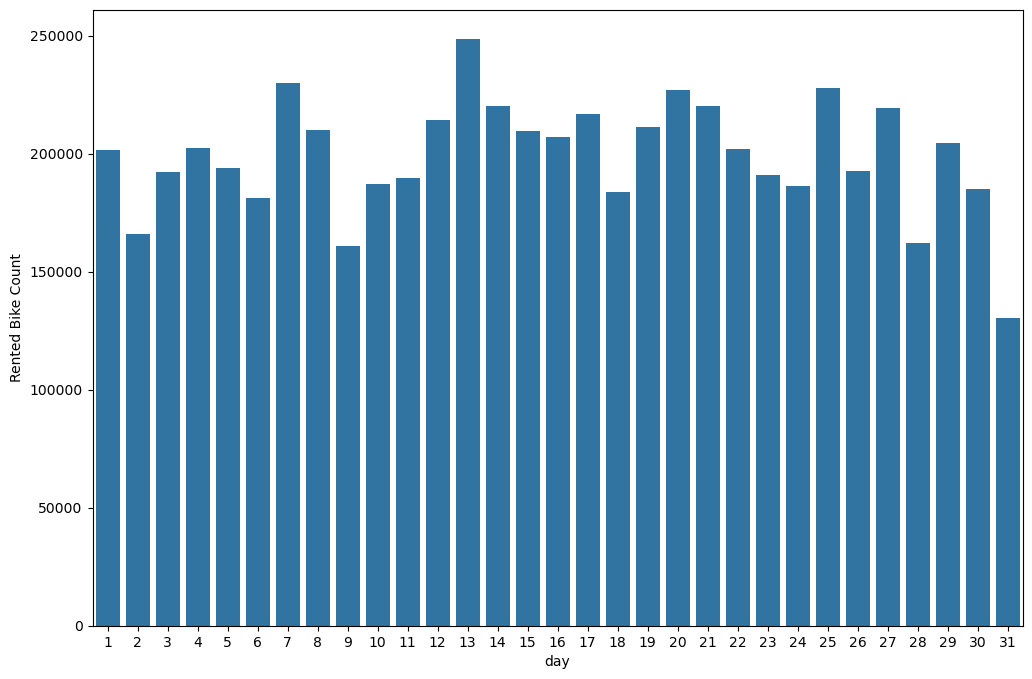

In [25]:
days = df.groupby("day").sum().reset_index()
plt.figure(figsize = (12,8))
sns.barplot(x = "day", y = "Rented Bike Count",data= days )
plt.show()

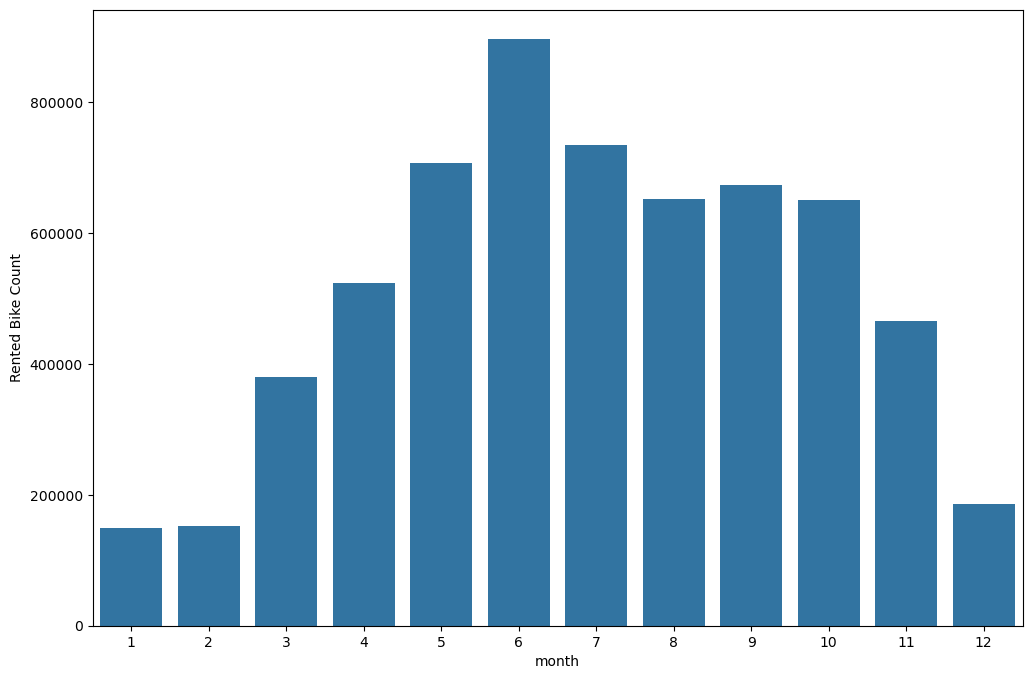

In [26]:
months = df.groupby("month").sum().reset_index()
plt.figure(figsize = (12,8))
sns.barplot(x = "month", y = "Rented Bike Count",data= months )
plt.show()

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

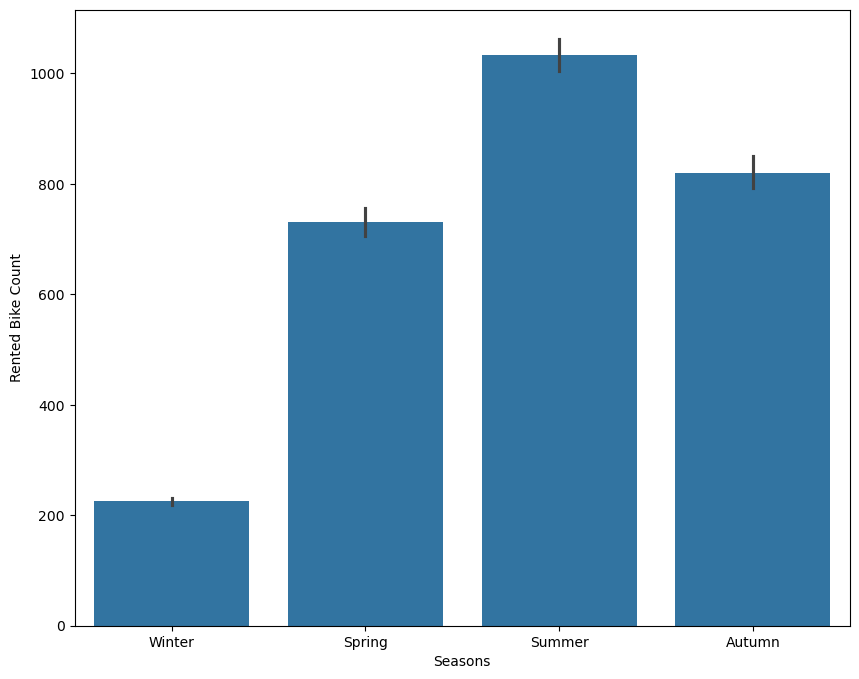

In [27]:
plt.figure(figsize = (10,8))
sns.barplot(x = "Seasons", y = "Rented Bike Count",data= df )

### summary

1. we can see that maximum number of people renting bikes in __summer__ ,__spring__,__Autumn__ season
2. people dosent like to rent bike on weekend(may be holiday)


## Checking Outlier

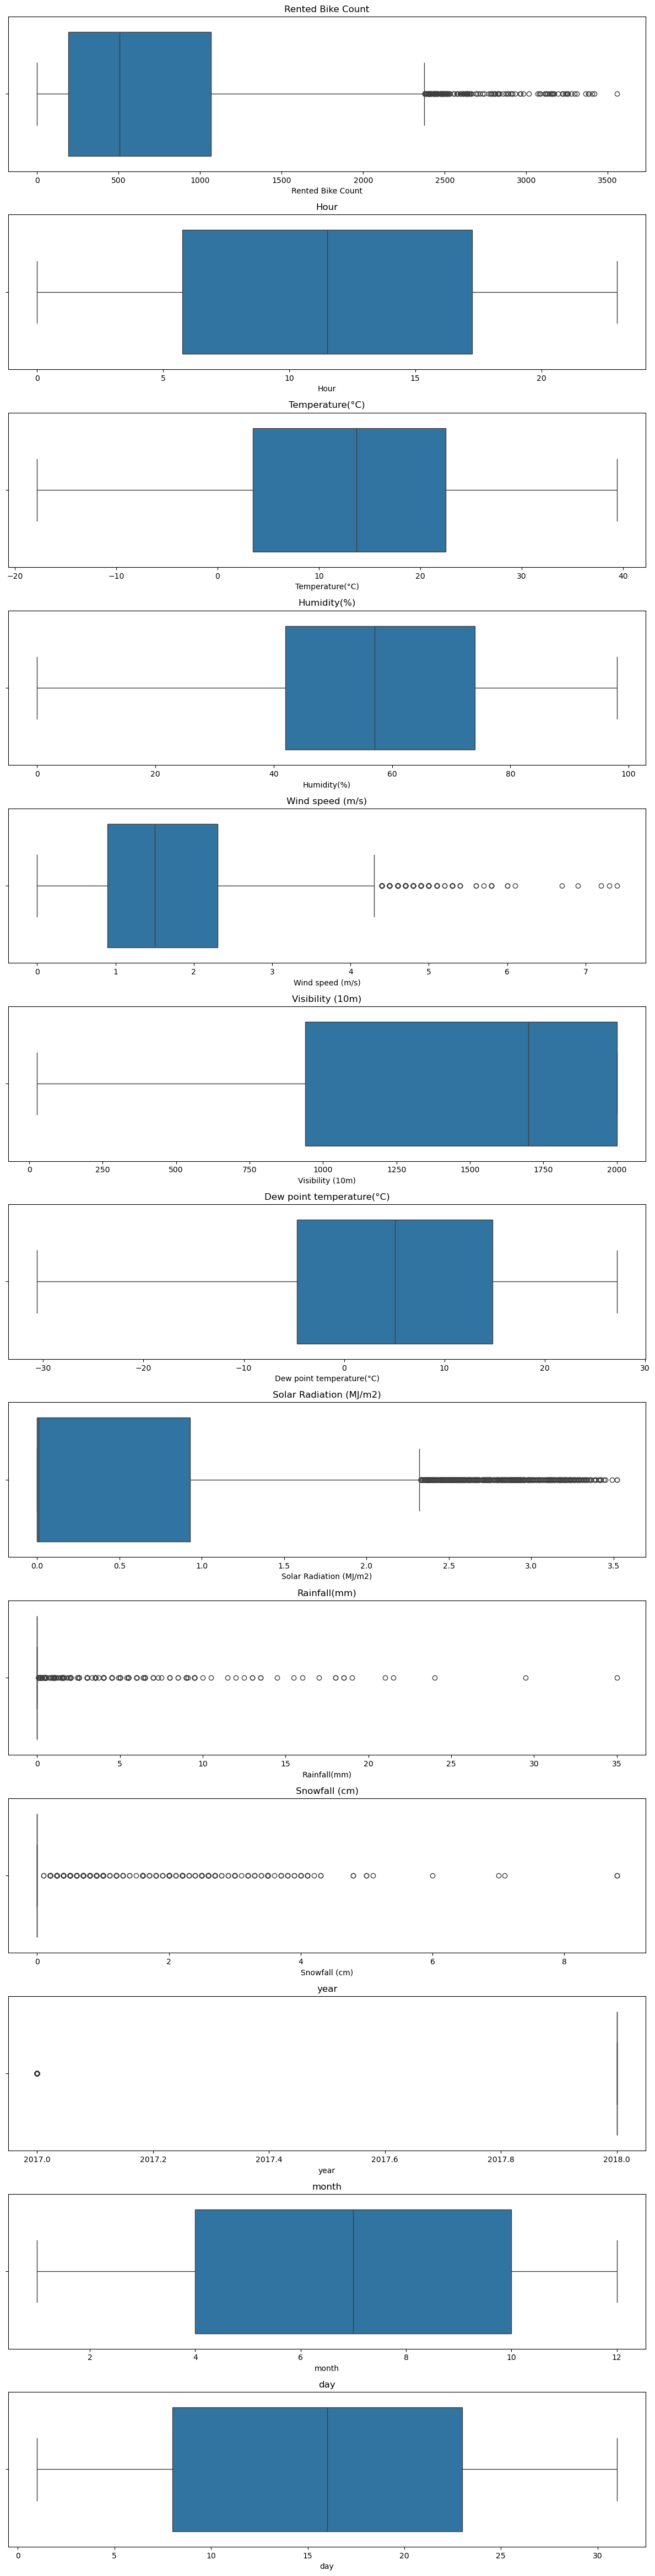

In [28]:
plt.figure(figsize = (12,50))
counter = 1
for var in numerical_var:
    if counter < 20:
        plt.subplot(14,1,counter)
        sns.boxplot(x = var, orient = "h", data =df)
        plt.title(var)
    counter += 1
plt.tight_layout()

## Checking MultiCollinearity

<Axes: >

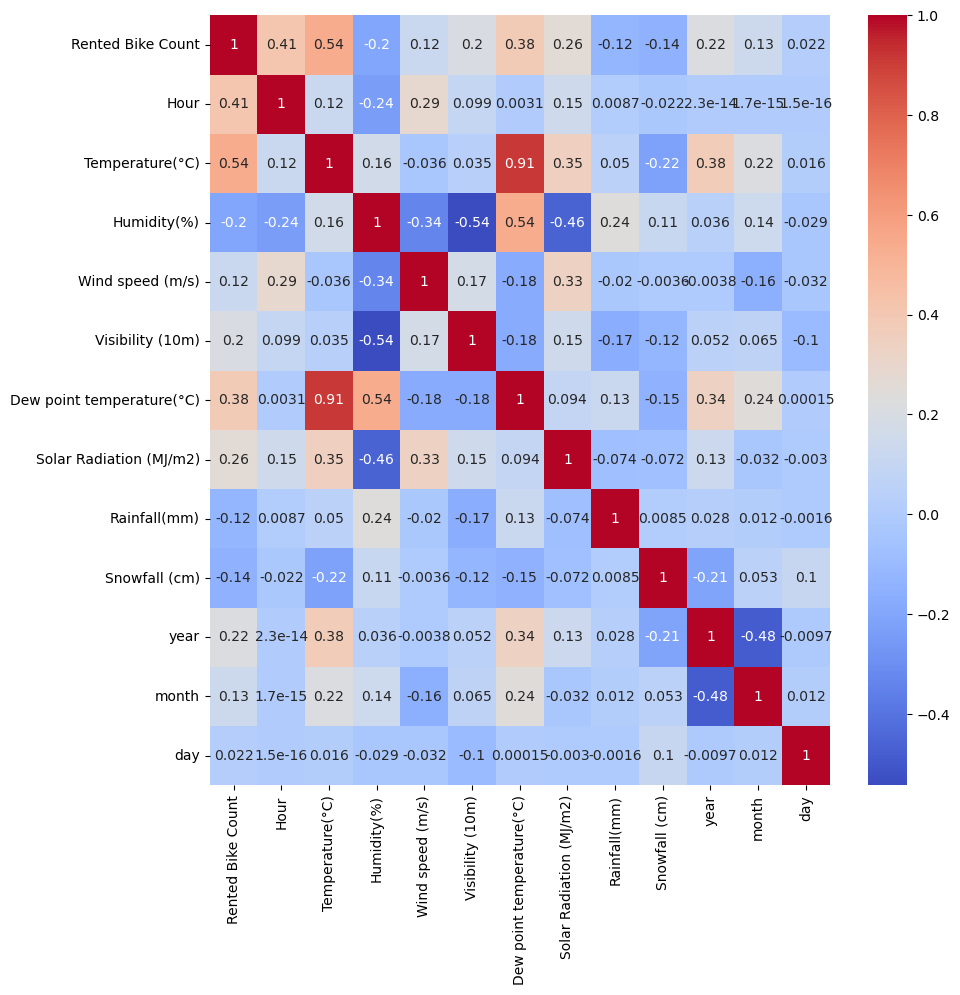

In [29]:
plt.figure(figsize = (10,10))
sns.heatmap(df[numerical_var].corr(),annot=True, cmap = "coolwarm")

1. we can see Rented Bik count have good +ve correlation with __Dew point temperatue__ , __temperature__ and __hours__
2. we can see that __Dew point temperatue__ has good +ve correlation with humidity
3. we can see there is strong +ve correlation between __dew point temperature__ and __temperature__ therefor it is showing multicollinearity
   
-- __Dew point temperature__ is suspect but there is confusion that which has to be removed from data so we use __VIF__ for final conclusion

In [30]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# variables =  df[numerical_var]
# variables.drop(columns = "Temperature(°C)",index =1,inplace =True)
# vif = pd.DataFrame()
# vif["VIF"] = [variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
# vif["features"] = variables.columns

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =  df[numerical_var]
variables.drop(columns = "Dew point temperature(°C)",index =1,inplace =True)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [33]:
vif

,VIF,features
0,4.154667,Rented Bike Count
1,5.056280,Hour
2,5.012922,Temperature(°C)
3,25.008605,Humidity(%)
4,4.884438,Wind speed (m/s)
5,10.722689,Visibility (10m)
6,2.798850,Solar Radiation (MJ/m2)
7,1.109987,Rainfall(mm)
8,1.150496,Snowfall (cm)
9,64.224811,year


we can see that how __Dew point temperature(°C)__ affecting the other variable,so it is better to remove __Dew point temperature(°C)__

In [34]:
df.drop(columns = "Dew point temperature(°C)", axis = 1 ,inplace = True)

## Feature Engineering

In [35]:
categorical_var

['Seasons', 'Holiday', 'Functioning Day', 'weekday']

In [36]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,weekday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday


In [37]:
df.Holiday = df.Holiday.map({"Holiday" : 0 , "No Holiday": 1})
df['Functioning Day'] = df['Functioning Day'].map({"Yes": 1 , "No": 0})

In [38]:
df["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [39]:
df_seasons  = pd.get_dummies(df["Seasons"],drop_first = True).astype(int)
df_weekday  = pd.get_dummies(df["weekday"],drop_first = True).astype(int)

In [40]:
df_seasons,df_weekday

(      Spring  Summer  Winter
 0          0       0       1
 1          0       0       1
 2          0       0       1
 3          0       0       1
 4          0       0       1
 ...      ...     ...     ...
 8755       0       0       0
 8756       0       0       0
 8757       0       0       0
 8758       0       0       0
 8759       0       0       0
 
 [8760 rows x 3 columns],
       Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
 0          0         0       0         0        0          0
 1          0         0       0         0        0          0
 2          0         0       0         0        0          0
 3          0         0       0         0        0          0
 4          0         0       0         0        0          0
 ...      ...       ...     ...       ...      ...        ...
 8755       0         0       0         0        0          0
 8756       0         0       0         0        0          0
 8757       0         0       0         0        0    

In [41]:
df= pd.concat([df,df_seasons,df_weekday],axis = 1)

In [42]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,weekday,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,...,Friday,0,0,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,...,Friday,0,0,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,...,Friday,0,0,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,...,Friday,0,0,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,...,Friday,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,...,Friday,0,0,0,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,...,Friday,0,0,0,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,...,Friday,0,0,0,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,...,Friday,0,0,0,0,0,0,0,0,0


In [43]:
df.drop(columns = ["Seasons","weekday"],axis =1,inplace = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  year                     8760 non-null   int32  
 12  month                    8760 non-null   int32  
 13  day                      8760 non-null   int32  
 14  Spring                  

In [45]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,day,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0


## Spliting DataSet and Creating Modal

In [46]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,day,Spring,Summer,Winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,1,...,30,0,0,0,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,1,...,30,0,0,0,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,1,...,30,0,0,0,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,1,...,30,0,0,0,0,0,0,0,0,0


In [47]:
X = df.drop(columns = "Rented Bike Count", axis = 1)

In [48]:
y = df["Rented Bike Count"]

## Scaleing data

In [49]:
sc = StandardScaler()

In [50]:
sc.fit(X)
X_scaled = sc.transform(X)

In [51]:
X_scaled

array([[-1.66132477, -1.51395724, -1.04248288, ..., -0.40759561,
        -0.40759561, -0.40759561],
       [-1.51686175, -1.53907415, -0.99336999, ..., -0.40759561,
        -0.40759561, -0.40759561],
       [-1.37239873, -1.58093567, -0.94425709, ..., -0.40759561,
        -0.40759561, -0.40759561],
       ...,
       [ 1.37239873, -0.86091752, -0.94425709, ..., -0.40759561,
        -0.40759561, -0.40759561],
       [ 1.51686175, -0.90277904, -0.8460313 , ..., -0.40759561,
        -0.40759561, -0.40759561],
       [ 1.66132477, -0.91952365, -0.74780551, ..., -0.40759561,
        -0.40759561, -0.40759561]])

In [52]:
# now spliting
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.2 , random_state = 44)

## Traning Model

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred = lr.predict(X_test)

In [56]:
y_pred

array([ 412.64400255,  424.59171835, 1100.3224123 , ...,  753.1374205 ,
        890.13492001,  -40.91581084])

## Model Evaluvation

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [70]:
def get_metrics(y_test,y_pred,model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE= np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    print( f' {model_name}:  [MSE : {MSE}, RMSE : {RMSE} , MAE: {MAE}, R2 : {R2}]')

In [71]:
get_metrics(y_test, y_pred, "LinearRegression")

 LinearRegression:  [MSE : 182012.37791967712, RMSE : 426.629087053001 , MAE: 319.17764831727703, R2 : 0.5609446360185241]


## Traning Multiple Algorithm

In [61]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [64]:
rir = Ridge().fit(X_train,y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train,y_train)
y_pred_lar = lar.predict(X_test)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly_r = LinearRegression().fit(X_train_poly,y_train)
y_pred_poly = poly_r.predict(X_test_poly)

svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

knn = KNeighborsRegressor().fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

xgb = XGBRegressor().fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [65]:
get_metrics(y_test, y_pred, "LinearRegression")
get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "PolynomialFeatures")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knn, "KNeighborsRegressor")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_xgb, "XGBRegressor")

 LinearRegression:  [MSE : 182012.37791967712, RMSE : 426.629087053001 , MAE: 319.17764831727703, R2 : 0.5609446360185241]
 Ridge:  [MSE : 181997.3289071182, RMSE : 426.6114495734007 , MAE: 319.14267399108735, R2 : 0.5609809376687862]
 Lasso:  [MSE : 182058.26141522077, RMSE : 426.6828581220726 , MAE: 318.32822908276836, R2 : 0.5608339545634115]
 PolynomialFeatures:  [MSE : 113619.80463188642, RMSE : 337.0753693640139 , MAE: 239.92032989083904, R2 : 0.7259231199090661]
 SVR:  [MSE : 323463.4793411538, RMSE : 568.7384982055935 , MAE: 387.620120344805, R2 : 0.21973232106489893]
 KNeighborsRegressor:  [MSE : 109300.34351598176, RMSE : 330.60602462142424 , MAE: 214.82694063926942, R2 : 0.7363426451859915]
 DecisionTreeRegressor:  [MSE : 60675.93607305936, RMSE : 246.3248588207438 , MAE: 137.46689497716895, R2 : 0.8536358048724014]
 RandomForestRegressor:  [MSE : 28602.71819098173, RMSE : 169.12338156204697 , MAE: 99.55802511415524, R2 : 0.9310037207923131]
 XGBRegressor:  [MSE : 23516.1281

#### we have to algorithm which is performing well 1. RandomForestRegressor , 2. XGBRegressor

## HyperPerameter Tuning RandomForest

In [80]:
from sklearn.model_selection import RandomizedSearchCV

#number of tree in randomforest

n_estimators = [int(x) for x in np.linspace(start = 200 , stop = 2000, num = 10)]

#number of features to consider at every split
max_features = ["auto", "sqrt"]

#maximum number of level allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10,120, num=12)]

#maximun number of sample required to split a node 
min_samples_split = [2, 5,10]

#maximum number of sample required at each leaf node
min_samples_leaf =  [1,2,4]

#method of selecting sample for training each tree
bootstrap = [True, False]

#create the random grid
random_grid = {
                'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap 
              }


In [81]:
import time
start_time = time.time()

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf , param_distributions = random_grid, n_iter = 100 , cv = 3, verbose =2, random_state = 42, n_jobs= -1 )
rf_random.fit(X_train,y_train)
y_pred_rf_random = rf_random.predict(X_test)
print(f'time taken to traning using randomized search', time.time() - start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
time taken to traning using randomized search 4229.833117246628


In [82]:
get_metrics(y_test, y_pred_rf_random, "RandomForestRegressor Fine Tuning")

 RandomForestRegressor Fine Tuning:  [MSE : 28034.44155487169, RMSE : 167.43488750816448 , MAE: 98.71253954664057, R2 : 0.9323745336357098]


## HyperParameter Tuning for XGBoost Regressor

In [86]:
from sklearn.model_selection import RandomizedSearchCV

import time
start_time = time.time()

params = {
            'max_depth': [3,5,6,10,15,20],
            'learning_rate': [0.01, 0.1, 0.2, 0.3],
            'subsample': np.arange(0.5,1.0,0.1),
            'colsample_bytree': np.arange(0.4,1.0,0.1),
            'colsample_bylevel': np.arange(0.4,1.0,0.1),
            'n_estimator': [100,500,1000]
         }
xgbr = XGBRegressor(seed = 20)
rscv = RandomizedSearchCV(estimator = xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter =25,
                         cv =5,
                         verbose = 1)
rscv.fit(X_train, y_train)
y_pred_xgbr_random = rscv.predict(X_test)
get_metrics(y_test,y_pred_xgbr_random,"XGBRegressor with Best Perameters")
print("Time taken to hypertune" , time.time() - start_time)
print("best perameters" ,rscv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
 XGBRegressor with Best Perameters:  [MSE : 22332.920703074677, RMSE : 149.44203124648257 , MAE: 90.89259722242004, R2 : 0.9461279021782516]
Time taken to hypertune 218.73550701141357
best perameters {'subsample': 0.8999999999999999, 'n_estimator': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5}
